In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FIREBLZE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('spam_ham_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [3]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]:\S+|subject:\S+|nbsp"

In [4]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

data.text = data.text.apply(lambda x: preprocess(x))
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,subject: enron methanol ; meter # : 988291 fol...,0
1,2349,ham,"subject: hpl nom january 9 , 2001 ( see attach...",0
2,3624,ham,"subject: neon retreat ho ho ho , ' around wond...",0
3,4685,spam,"subject: photoshop , windows , office . cheap ...",1
4,2030,ham,subject: : indian springs deal book teco pvr r...,0


In [5]:
data = data.drop(['Unnamed: 0', 'label'], axis=1)
data = data.rename(columns = {"label_num" : "Label"})
data

,text,Label
0,subject: enron methanol ; meter # : 988291 fol...,0
1,"subject: hpl nom january 9 , 2001 ( see attach...",0
2,"subject: neon retreat ho ho ho , ' around wond...",0
3,"subject: photoshop , windows , office . cheap ...",1
4,subject: : indian springs deal book teco pvr r...,0
...,...,...
5166,subject: put 10 ft transport volumes decreased...,0
5167,subject: 3 / 4 / 2000 following noms hpl ' tak...,0
5168,subject: calpine daily gas nomination > > juli...,0
5169,subject: industrial worksheets august 2000 act...,0


<AxesSubplot:xlabel='Label', ylabel='count'>

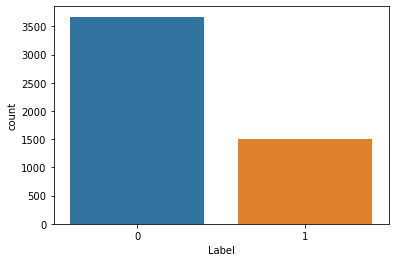

In [6]:
sns.countplot(x="Label", data=data)

In [7]:
x = data['text']
y = data['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                         random_state=7)
print("Train Data size:", len(x_train))
print("Test Data size", len(x_test))

Train Data size: 3878
Test Data size 1293


In [8]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1000
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 43372


In [9]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = 50)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = 50)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (3878, 50)
Testing X Shape: (1293, 50)


In [10]:
from keras.layers import SimpleRNN
rnn = Sequential()
rnn.add(SimpleRNN(50, activation='relu', input_dim=50 , return_sequences = True))
rnn.add(SimpleRNN(55, activation='relu' ,  return_sequences = False))
# Adding dropout to prevent overfitting
rnn.add(Dropout(0.1))
rnn.add(Dense(1, activation='sigmoid'))

In [11]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(x_train.shape)
print(y_test.shape)

(3878, 50)
(1293,)


In [12]:
x_train1 = x_train.reshape(3878,1,50)
y_train1 = np.array(y_train).reshape(3878,1,1)
x_test1 = x_test.reshape(1293,1,50)
y_test1 = np.array(y_test).reshape(1293,1,1)

In [13]:

history2 = rnn.fit(x_train1, y_train1,
                  batch_size=40,
                  epochs=100,
                  verbose=2,
                  validation_data=(x_test1, y_test1))

Epoch 1/100
97/97 - 1s - loss: 398.2971 - accuracy: 0.5970 - val_loss: 162.5631 - val_accuracy: 0.6504
Epoch 2/100
97/97 - 0s - loss: 171.9382 - accuracy: 0.6310 - val_loss: 110.9832 - val_accuracy: 0.6481
Epoch 3/100
97/97 - 0s - loss: 107.0059 - accuracy: 0.6594 - val_loss: 93.1241 - val_accuracy: 0.6806
Epoch 4/100
97/97 - 0s - loss: 72.8306 - accuracy: 0.6821 - val_loss: 76.4094 - val_accuracy: 0.6613
Epoch 5/100
97/97 - 0s - loss: 48.3674 - accuracy: 0.6970 - val_loss: 63.0638 - val_accuracy: 0.6775
Epoch 6/100
97/97 - 0s - loss: 36.8493 - accuracy: 0.7001 - val_loss: 51.1793 - val_accuracy: 0.6334
Epoch 7/100
97/97 - 0s - loss: 27.9794 - accuracy: 0.7109 - val_loss: 42.4073 - val_accuracy: 0.6698
Epoch 8/100
97/97 - 0s - loss: 20.4860 - accuracy: 0.7274 - val_loss: 35.2045 - val_accuracy: 0.6543
Epoch 9/100
97/97 - 0s - loss: 14.1099 - accuracy: 0.7295 - val_loss: 30.6425 - val_accuracy: 0.6334
Epoch 10/100
97/97 - 0s - loss: 11.0992 - accuracy: 0.7329 - val_loss: 26.5753 - val_a

Epoch 83/100
97/97 - 0s - loss: 0.3724 - accuracy: 0.8388 - val_loss: 4.8440 - val_accuracy: 0.7765
Epoch 84/100
97/97 - 0s - loss: 0.3710 - accuracy: 0.8442 - val_loss: 5.2494 - val_accuracy: 0.7633
Epoch 85/100
97/97 - 0s - loss: 0.3817 - accuracy: 0.8427 - val_loss: 4.5739 - val_accuracy: 0.7711
Epoch 86/100
97/97 - 0s - loss: 0.3621 - accuracy: 0.8409 - val_loss: 5.5412 - val_accuracy: 0.7850
Epoch 87/100
97/97 - 0s - loss: 0.3623 - accuracy: 0.8422 - val_loss: 6.1603 - val_accuracy: 0.7819
Epoch 88/100
97/97 - 0s - loss: 0.3680 - accuracy: 0.8504 - val_loss: 5.4925 - val_accuracy: 0.7780
Epoch 89/100
97/97 - 0s - loss: 0.3351 - accuracy: 0.8548 - val_loss: 5.7152 - val_accuracy: 0.7796
Epoch 90/100
97/97 - 0s - loss: 0.3430 - accuracy: 0.8517 - val_loss: 5.2696 - val_accuracy: 0.7734
Epoch 91/100
97/97 - 0s - loss: 0.3503 - accuracy: 0.8530 - val_loss: 4.3895 - val_accuracy: 0.7742
Epoch 92/100
97/97 - 0s - loss: 0.3467 - accuracy: 0.8515 - val_loss: 4.3241 - val_accuracy: 0.7680


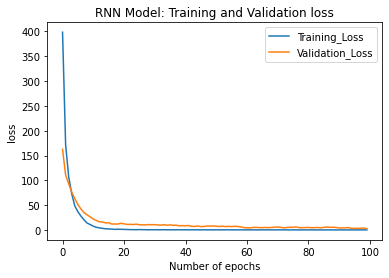

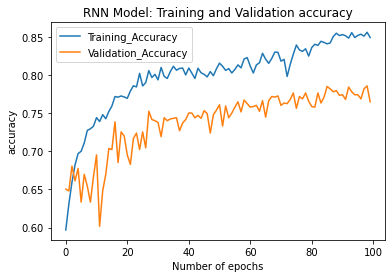

In [14]:
metrics_RNN = pd.DataFrame(history2.history)
# Rename column
metrics_RNN.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs2(var1, var2, string):
    metrics_RNN[[var1, var2]].plot()
    plt.title('RNN Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs2('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs2('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [15]:
trainPredict = rnn.predict(x_train1)
testPredict= rnn.predict(x_test1)

predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = rnn.evaluate(x_test1, y_test1, verbose=0)
print("Our accuracy is %{}".format(trainScore[1]*100))

Our accuracy is %76.48878693580627


In [25]:
from sklearn.metrics import precision_recall_curve
y_pred=rnn.predict_proba(x_test1)
p,r,_ = precision_recall_curve(y_test,y_pred)
auc_score = auc(r, p)

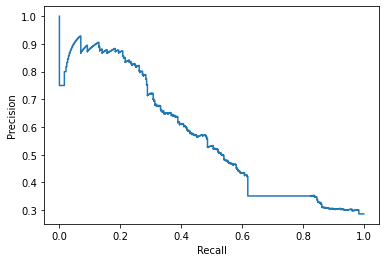

In [26]:
disp = PrecisionRecallDisplay(precision=p, recall=r)
disp.plot()


In [27]:
print(auc_score)

0.5698116096882355
